## 支持向量机SVM
### 什么是支持向量机
SVM是一种监督机器学习算法，用来分类或回归。更多的用来处理分类问题。  
在这个算法中，我们将根据特征值，在n维空间（n是由特征数量决定）中画出每一个数据项。
### 数据如何分类
我们通过找到超平面（hyperplane）来执行分类，这种方式能够很好地区分两个类别。即是说，SVM算法的输出就是一个优化的超平面，这个超平面能够对新的实例进行分类。
### 什么是优化超平面
对于SVM来说，是一个距离两类数据最远的一个超平面，即是说，这个超平面到最近的元素距离最远。
### 非线性数据
1. 在本例中，我们无法通过一条直线画出线性边界。因此，增加第三个维度z，并定义z是一个能够通过具体方式计算的：z=x^2+y^2（就是一个圆）。
2. 对于一个三维空间，从另一个角度来看（在1中是俯视，现在更换为侧视），数据是可以线性分为两组，因为z=x^2+y^2，可知z>=0
3. 在这个三维空间中，超平面就与x轴平行的某一个z值。我们所选择的超平面，就是那个与每一个分类距离都最远的。
4. 现在重新回到俯视角度（二维视图），可以发现最终选择的边界就是一个圆，将两类数据分开。
## 调整参数
### 核函数（Kernel）
学习线性SVM的超平面就是通过线性代数转换问题，多项式（polynomial）和指数（exponential）核函数在高维计算划分线，被称为核函数技巧。
### 正则化（Regularization）
对于较大数值的参数，我们选择更小间距的超平面，如果这个超平面能够更好地区分训练集。相反，如果对于较小数值的参数，需要使用更大间距，即使超平面误划分了更多的点。
### 系数（Gamma）
系数定义了单个训练集合的影响程度，小的系数值，距离划分线较远的点将被纳入计算中，而大的系数值意味着与划分线的距离较近的点将被纳入计算。
### 间距（Margin）
间距是值到最近的分界线，一个好的分界线距离两边数据更远，并且能够把点区分开而不会穿过另一类。
## 具体实现
### 引入库
~~~python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
~~~
### 导入数据并划分训练和测试值
~~~python
data=pd.read_excel('.\socialnetwork_ads.xlsx')
data.head()
X=data.iloc[:,[2,3]].values
Y=data.iloc[:,4].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(Y_test)
~~~
### 特征量化
~~~python
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X=sc.fit_transform(X)
~~~
### 拟合SVM到训练集，预测测试集结果
~~~python
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
~~~
### 构建混淆矩阵
~~~python
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)
~~~
### 结果可视化
这里只列出了训练集的可视化代码，测试集类似
~~~python
from matplotlib.colors import ListedColormap
X_set,Y_set=X_train,Y_train
X1,X2=np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
~~~

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
data=pd.read_excel('.\socialnetwork_ads.xlsx')
data.head()
X=data.iloc[:,[2,3]].values
Y=data.iloc[:,4].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
print(Y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X=sc.fit_transform(X)

In [19]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
pred=classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)

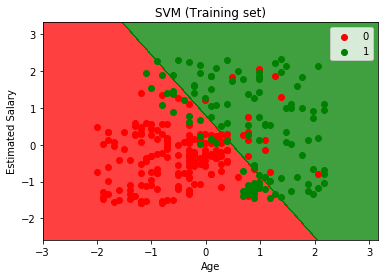

In [22]:
from matplotlib.colors import ListedColormap
X_set,Y_set=X_train,Y_train
X1,X2=np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

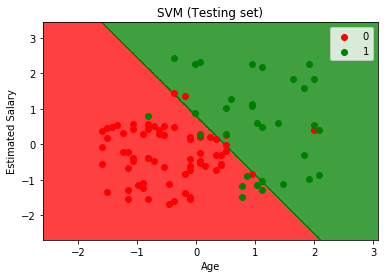

In [28]:
from matplotlib.colors import ListedColormap
X_set,Y_set=X_test,Y_test
X1,X2=np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

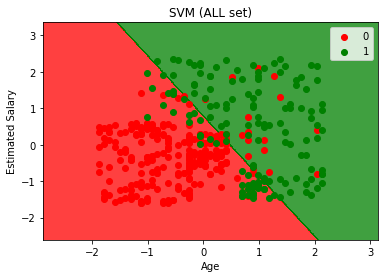

In [29]:
from matplotlib.colors import ListedColormap
X_set,Y_set=X,Y
X1,X2=np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (ALL set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()